In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yt

from gallifrey.model import Model
from gallifrey.particles import rotated_dataset
from gallifrey.visualization.yt_maps import plot_component_maps

## DATA SETUP

In [4]:
snapshot = 127
resolution = 8192
sim_id = "37_11"

In [5]:
model = Model(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
)
ds = model.ds
mw = model.halo

yt : [INFO     ] 2023-11-25 12:50:08,221 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-11-25 12:50:08,375 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-11-25 12:50:08,376 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-11-25 12:50:08,377 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-11-25 12:50:08,378 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-11-25 12:50:08,379 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-11-25 12:50:08,380 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-11-25 12:50:08,381 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-11-25 12:50:08,381 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-11-25 12:50:08,382 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-11-25 12:50:08,385 Parameters: hubble_constant      

## PLOT SETUP

In [6]:
figure_subdirectory = f"MilkyWayAnalogue/{model.resolution}/{model.sim_id}/{model.snapshot}/Galaxy_component_maps"
save = True

## CREATE DATA SOURCE

In [7]:
radius = 0.2 * mw.virial_radius()
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [8]:
sphere_data = mw.sphere(radius=radius)
rotated_data = {
    component: rotated_dataset(
        sphere_data,
        mw.centre(),
        normal_vector,
        [
            (f"{component}_stars", "total_number"),
        ],
        bounding_box=[
            [-ds.domain_width[0].to("kpc") / 2, ds.domain_width[0].to("kpc") / 2]
        ]
        * 3,
    )
    for component in ["bulge", "thin_disk", "thick_disk", "halo", "galaxy"]
}

yt : [INFO     ] 2023-11-25 12:50:45,827 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-11-25 12:50:45,831 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-11-25 12:50:45,832 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2023-11-25 12:50:45,833 Parameters: domain_right_edge         = [73778.96826036 73778.96826036 73778.96826036]
yt : [INFO     ] 2023-11-25 12:50:45,835 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-11-25 12:50:45,838 Allocating for 7.073e+05 particles
yt : [INFO     ] 2023-11-25 12:51:01,429 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-11-25 12:51:01,431 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-11-25 12:51:01,433 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2023-11-25 12:51:01,434 Parameters: domain_right_edge         = [73778.96826036 73778.

## PLOT MAPS

yt : [INFO     ] 2023-11-25 12:51:49,826 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:49,828 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:49,831 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:49,832 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:49,849 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-25 12:51:55,457 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:55,460 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:55,464 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:55,464 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:55,467 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-25 12:51:59,700 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:59,702 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:51:59,706 xlim = -21.

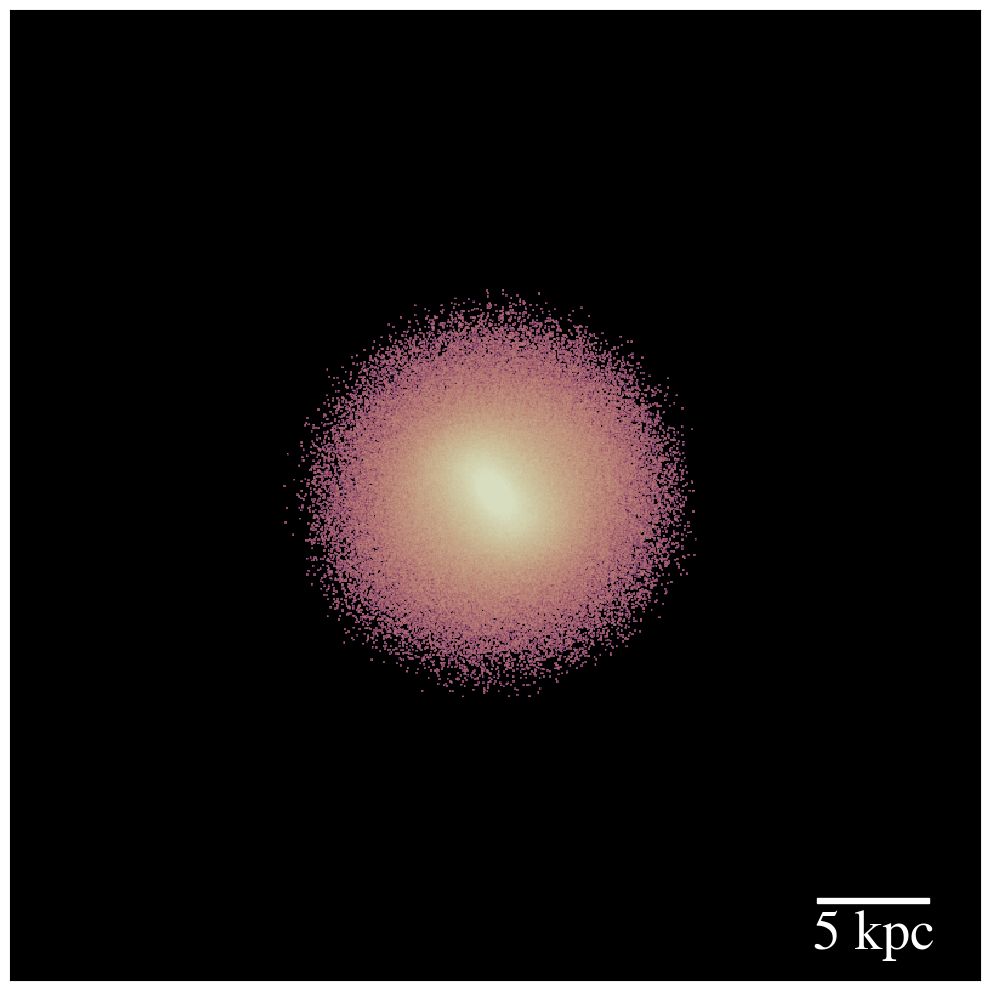

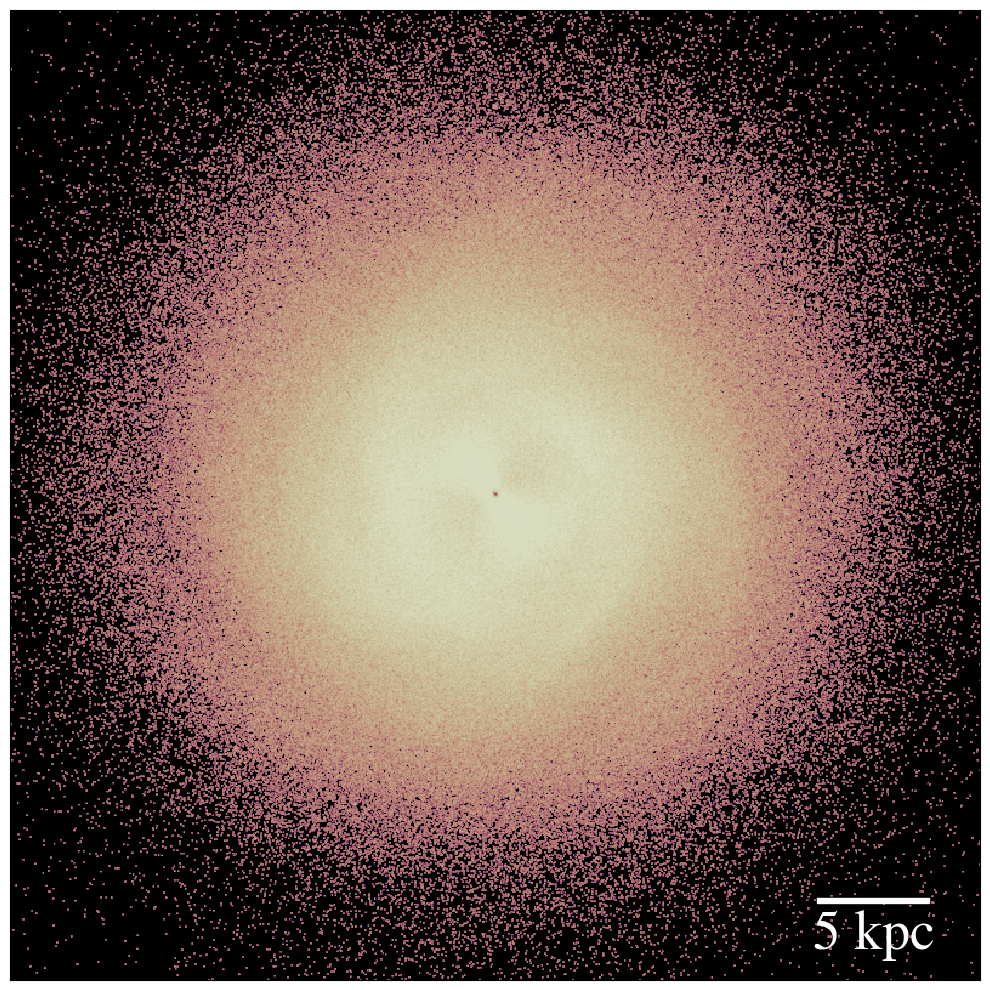

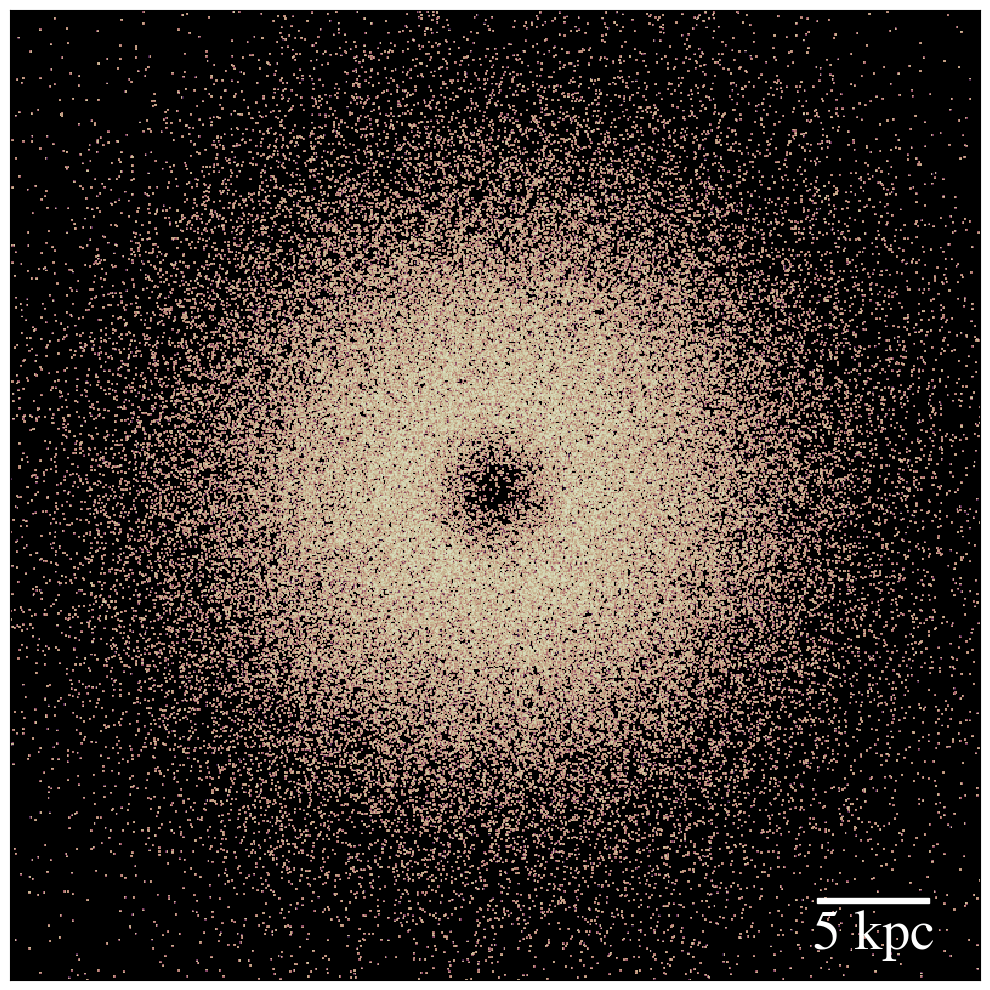

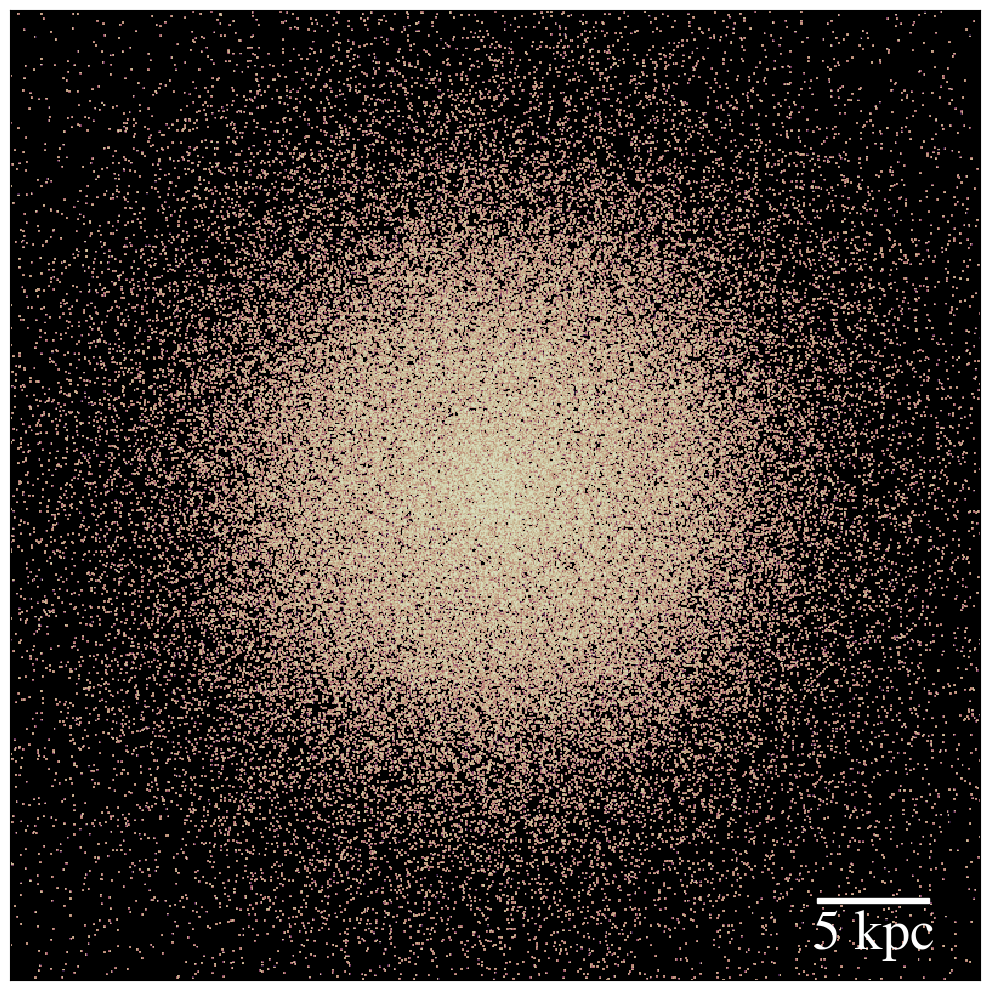

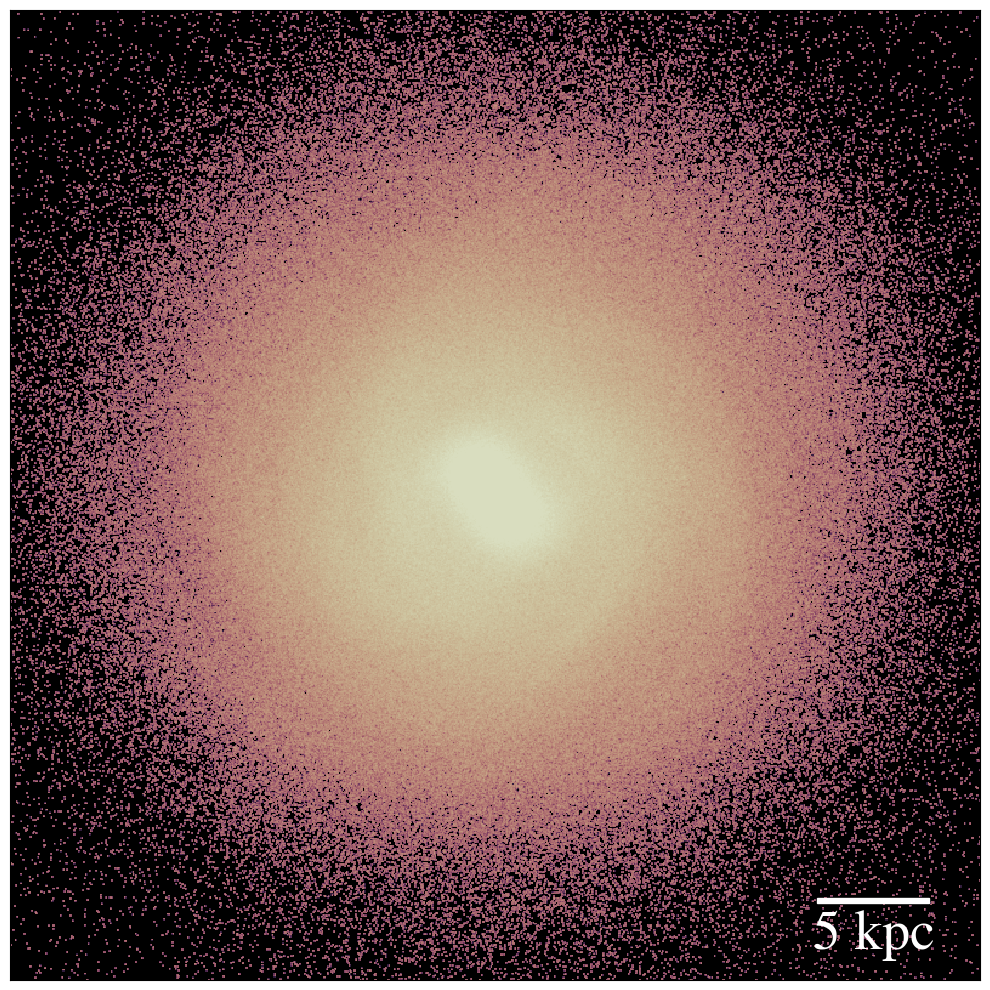

In [9]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    depth=(10, "kpc"),
    normal="z",
    save=save,
    figure_subdirectory=figure_subdirectory,
)

yt : [INFO     ] 2023-11-25 12:52:14,555 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:52:14,556 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-25 12:52:14,560 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:52:14,561 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-25 12:52:14,563 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'


yt : [INFO     ] 2023-11-25 12:52:16,973 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:52:16,975 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-25 12:52:16,978 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:52:16,979 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-25 12:52:16,981 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-25 12:52:20,034 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:52:20,036 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-25 12:52:20,040 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:52:20,040 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-25 12:52:20,043 Splatting (('thick_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-25 12:52:22,203 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-25 12:52:22,204 ylim = -5.000000 5.000000
yt : [INFO     ] 2023-11-25 12:52:22,208 xlim = -21.65000

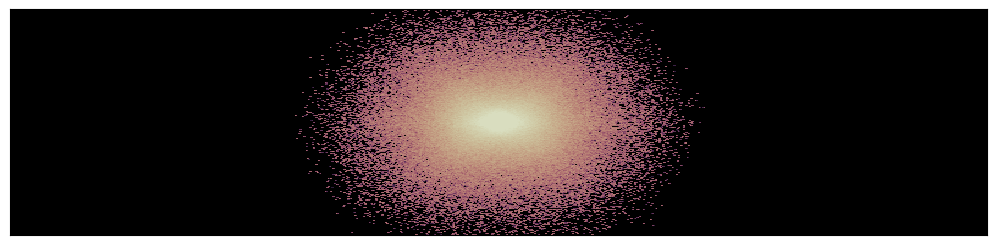

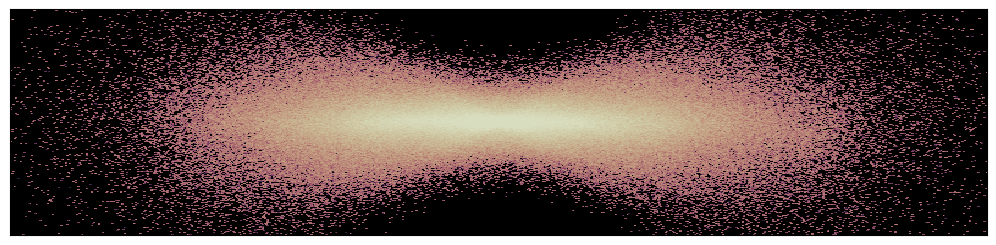

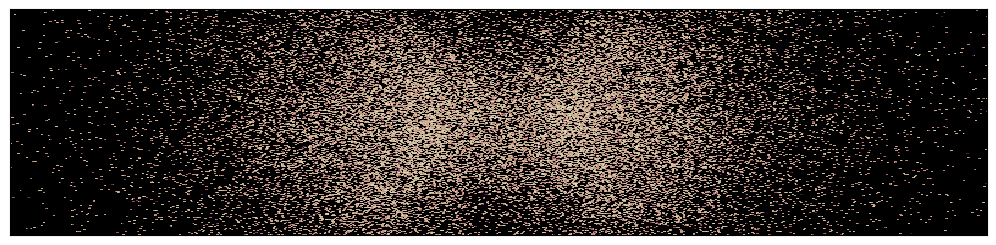

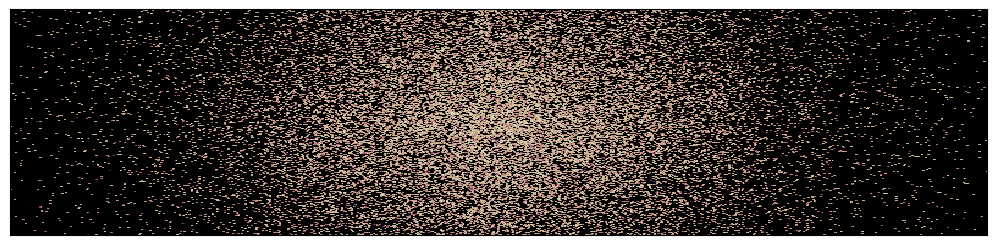

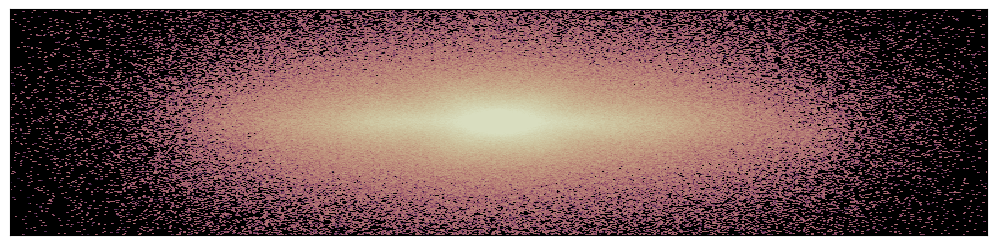

In [10]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="x",
    width=((43.3, "kpc"), (10, "kpc")),
    depth=(10, "kpc"),
    save=save,
    annotate_scale=False,
    figure_subdirectory=figure_subdirectory,
)